In [2]:
import pandas as pd

# Adjust the path if necessary
df = pd.read_csv('../data/sierraleone-bumbuna.csv')  # replace with actual file name
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
# Descriptive statistics
df.describe()

# Missing values percentage
df.isna().sum() / len(df) * 100

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [4]:
from scipy.stats import zscore

cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols].apply(zscore)
outliers = (abs(z_scores) > 3).any(axis=1)
df_clean = df[~outliers]

In [6]:
df_clean = df[~outliers].copy()

In [7]:
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

In [8]:
from scipy.stats import zscore

cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols].apply(zscore)
outliers = (abs(z_scores) > 3).any(axis=1)

# Make a copy to avoid SettingWithCopyWarning
df_clean = df[~outliers].copy()

# Fill missing values
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

In [10]:
# Fill missing values using median (numeric only)
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

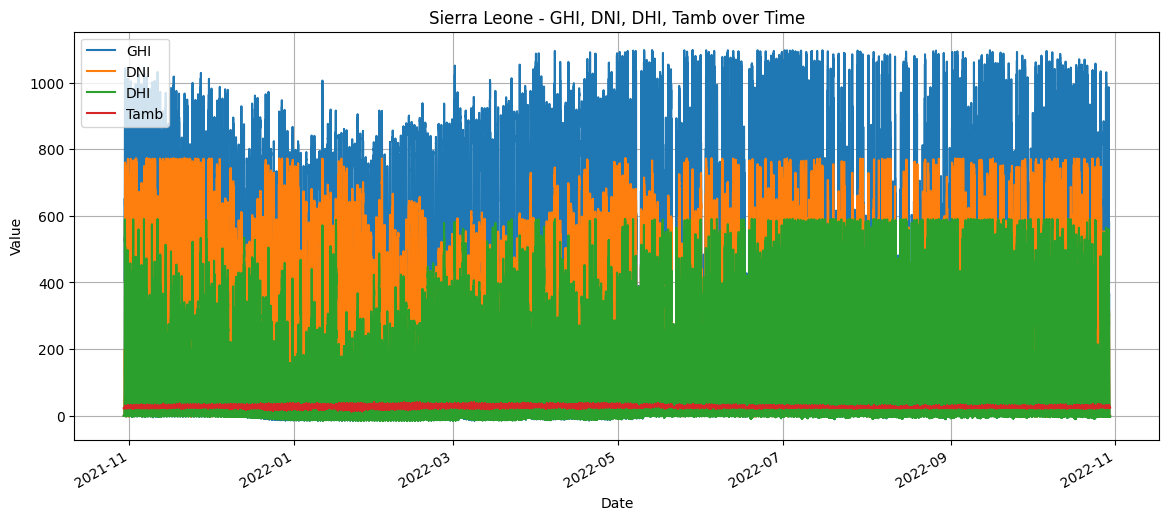

In [11]:
import matplotlib.pyplot as plt

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(14,6))
plt.title('Sierra Leone - GHI, DNI, DHI, Tamb over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [12]:
df_clean.to_csv('../data/sierraleone_clean.csv', index=False)